### **Name:** *`Urooj Fatima`*  
### **DHC-ID:** `DHC-29`   
### **Domain:** *`AI/ML Engineering Internship Tasks`*  
# **`DevelopersHub Corporation`**   

 # Internships Advanced Tasks  
### Task 1: Telco Customer Churn Prediction

In [1]:
# Imports & configuration
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from pathlib import Path
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix

# plotting
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

# Config
DATA_PATH = "telco_churn.csv"
RANDOM_STATE = 42
TEST_SIZE = 0.2
OUT_JOBLIB = "churn_pipeline.joblib"


## Problem Statement

Predict whether a customer will churn (leave the service) using the Telco Customer Churn dataset.
This notebook demonstrates an end-to-end, production-ready pipeline:
- Data loading & cleaning
- Preprocessing with `ColumnTransformer` (scaling + encoding)
- Model selection between Logistic Regression and Random Forest via `GridSearchCV`
- Evaluation with ROC AUC, accuracy, classification report, confusion matrix
- Exporting the final pipeline using `joblib`


In [3]:
# Load dataset
df = pd.read_csv(DATA_PATH)
print('Dataset shape:', df.shape)
display(df.head())
display(df.info())
display(df.describe(include='all').T)
print('\nTarget distribution:')
print(df['Churn'].value_counts(dropna=False))

Dataset shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Target distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [6]:
# Data cleaning
# Convert TotalCharges to numeric if needed
if 'TotalCharges' in df.columns and df['TotalCharges'].dtype == object:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip().replace('', np.nan), errors='coerce')

# Drop customerID if present
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])

print('After cleaning, dataset shape:', df.shape)
display(df.isnull().sum())

After cleaning, dataset shape: (7043, 20)


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# Prepare preprocessing pipeline
X = df.drop(columns=['Churn'])
numeric_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category','bool']).columns.tolist()

print('Numeric cols:', numeric_cols)
print('Categorical cols:', cat_cols)

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', cat_transformer, cat_cols)
])

Numeric cols: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical cols: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [10]:
# Map target and split
y = df['Churn'].map({'Yes':1, 'No':0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE, stratify=y)

print('Train size:', X_train.shape, 'Test size:', X_test.shape)

Train size: (5634, 19) Test size: (1409, 19)


In [12]:
# Build pipeline and parameter grid
base_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

param_grid = [
    {
        'clf': [LogisticRegression(max_iter=2000, solver='lbfgs')],
        'clf__C': [0.01, 0.1, 1.0, 10.0],
        'clf__penalty': ['l2'],
        'clf__class_weight': [None, 'balanced']
    },
    {
        'clf': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [None, 10, 20],
        'clf__class_weight': [None, 'balanced']
    }
]

grid = GridSearchCV(estimator=base_pipeline, param_grid=param_grid,
                    cv=5, scoring='roc_auc', n_jobs=-1, verbose=2, refit=True)

print('Starting GridSearchCV...')
grid.fit(X_train, y_train)
print('GridSearchCV done.')
print('Best params:', grid.best_params_)
print('Best CV roc_auc:', grid.best_score_)

Starting GridSearchCV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
GridSearchCV done.
Best params: {'clf': LogisticRegression(max_iter=2000), 'clf__C': 10.0, 'clf__class_weight': None, 'clf__penalty': 'l2'}
Best CV roc_auc: 0.8458549861893534


In [13]:
# Evaluation on test set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# predict_proba might be available
try:
    y_proba = best_model.predict_proba(X_test)[:,1]
except Exception:
    y_proba = None

print('Accuracy:', accuracy_score(y_test, y_pred))
if y_proba is not None:
    print('ROC AUC:', roc_auc_score(y_test, y_proba))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# show sample predictions
sample = X_test.head(5).copy()
sample['y_true'] = y_test.head(5).values
sample['y_pred'] = best_model.predict(sample.drop(columns=['y_true']))
display(sample)

Accuracy: 0.8055358410220014
ROC AUC: 0.8411558035598958

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Confusion Matrix:
[[926 109]
 [165 209]]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,y_true,y_pred
437,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),114.05,8468.20,0,0
2280,Female,1,No,No,8,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.15,908.55,0,1
2235,Female,0,Yes,Yes,41,Yes,Yes,DSL,Yes,Yes,...,No,Yes,No,One year,Yes,Credit card (automatic),78.35,3211.20,0,0
4460,Male,0,Yes,No,18,Yes,No,Fiber optic,No,No,...,Yes,No,No,Month-to-month,No,Electronic check,78.20,1468.75,0,0
3761,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,...,No,Yes,Yes,Two year,Yes,Credit card (automatic),82.65,5919.35,0,0


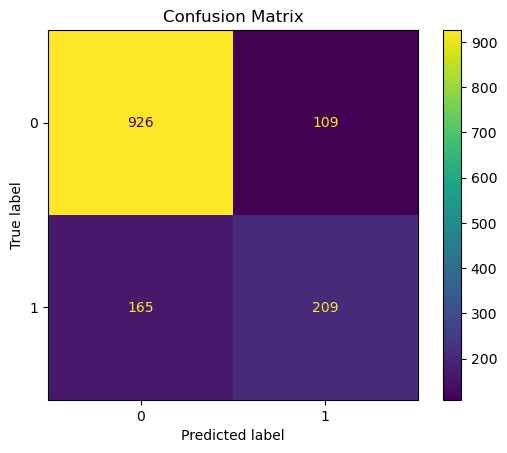

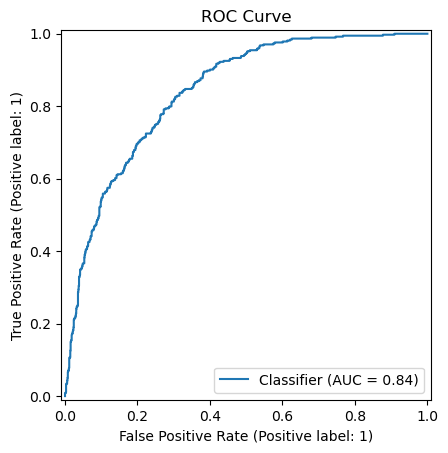

In [14]:
# Confusion matrix and ROC curve
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion Matrix')
plt.show()

if y_proba is not None:
    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title('ROC Curve')
    plt.show()

# If RandomForest is the chosen model, show feature importances (approximate)
from sklearn.ensemble import RandomForestClassifier
if isinstance(best_model.named_steps['clf'], RandomForestClassifier):
    # get feature names after preprocessing
    onehot = best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot']
    # numeric names
    num_names = numeric_cols
    # categorical names produced by onehot
    try:
        cat_ohe_names = onehot.get_feature_names_out(cat_cols).tolist()
    except Exception:
        cat_ohe_names = []
    feature_names = num_names + cat_ohe_names
    importances = best_model.named_steps['clf'].feature_importances_
    fi = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(20)
    print('Top feature importances (approx):')
    display(fi)

In [15]:
# Save the trained pipeline
joblib.dump(best_model, OUT_JOBLIB)
print(f'Saved pipeline to {OUT_JOBLIB}')

Saved pipeline to churn_pipeline.joblib


## How to use the saved model

```python
import pandas as pd
import joblib

model = joblib.load("churn_pipeline.joblib")

new_customer = pd.DataFrame([{
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 5,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 70.35,
    'TotalCharges': 350.5
}])

pred = model.predict(new_customer)
print('Churn prediction (0=no, 1=yes):', pred[0])
```


## Final Summary & Insights

- The notebook trains and evaluates a pipeline that includes preprocessing and a classifier.
- GridSearchCV compares Logistic Regression and Random Forest and selects the best model automatically.
- Save the `churn_pipeline.joblib` artifact for deployment or later inference.
- Next steps:
  - More feature engineering (tenure bucketing, interaction features).
  - Model calibration and threshold tuning based on business costs.
  - Deploy as a REST API (Flask/FastAPI) or a simple Streamlit dashboard.
